In [1]:
import sys

import pandas as pd
import numpy as np
import networkx as nx
import plfit
from numpy.random import rand,seed

# from matplotlib import use
# use("TkAgg") 
# import matplotlib
# import matplotlib.pyplot

import os
from IPython.display import Image

import plfit
from numpy.random import rand,seed

# %matplotlib agg
%matplotlib notebook

os.getcwd() 
if os.getcwd() + '/plpva_example'not in sys.path:
    sys.path.append(os.getcwd() + '/plpva_example')
    
%load_ext autoreload

%autoreload 1

%aimport plpva_example.example
%aimport plpva_example.plplot

plpva_example\plplot.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "C:\Anaconda3\envs\py27\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\Anaconda3\envs\py27\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\envs\py27\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Anaconda3\envs\py27\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "C:\Anaconda3\envs\py27\lib\site-packages\tornado\ioloop.py", line 1073, in start
    

In [2]:
from numpy import *
from itertools import combinations
from numpy.random import choice
from scipy.sparse import dok_matrix
import powerlaw

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, plot_mpl
init_notebook_mode(connected=True)

def get_binning(data, num_bins = 15, is_pmf = True, log_binning = False, threshold = 0, low=None, up=None):
    
    # Let's filter out the isolated nodes
    values = list(filter(lambda x:x>threshold, data))
    if len(values)!=len(data):
        print("%s isolated nodes have been removed" % (len(data)-len(values)))
    
    # We need to define the support of our distribution
    if not low:
        lower_bound = min(values)
        upper_bound = max(values)
    else:
        lower_bound = low
        upper_bound = up

    if log_binning:
        lower_bound = log10(lower_bound)
        upper_bound = log10(upper_bound)
        
        # Log binning
        bin_edges = logspace(lower_bound, upper_bound, num_bins+1, base = 10)
        
    else:

        # Linear Binning
        bin_edges = linspace(lower_bound, upper_bound, num_bins+1)
    
    if is_pmf:
        y, __ = histogram(values,bins = bin_edges, density = False)
        p = (y+0.00000000001)/y.sum()
        #print p
    else:
        p, __ = histogram(values, bins = bin_edges, density = True)
        
        #print(p.sum())
        #print((p*np.diff(bin_edges)).sum())
    
    # Now, we need to compute for each y the value of x
    x = bin_edges[1:] - diff(bin_edges)/2 # centering x at the midpoint of the bin
    
    x = x[p>0]
    p = p[p>0]
    
    return x,p

In [3]:
path_dataset_dir = "../German/"
# cent_15 = pd.read_excel( path_dataset_dir + "/02 Frühneuhochdeutsch early new high/15_cent.xlsx")
cent_15 = pd.read_excel( path_dataset_dir + "/02 Fruhneuhochdeutsch early new high/17_cent.xlsx")

G=nx.from_pandas_edgelist(cent_15, 'Source', 'Target')
# nx.draw(G, with_labels=True)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

Calculating best minimal value for power law fit
C:\Anaconda3\envs\py27\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in divide



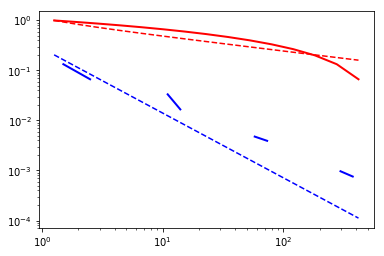

In [6]:
x, p = get_binning(degree_sequence, num_bins = 15, is_pmf = True, log_binning = True, threshold = 0, low=None, up=None)
# get_binning(data=degree_sequence, num_bins = 15, is_pmf = False, log_binning = True, threshold = 0, low=None, up=None)

fit = powerlaw.Fit(x, discrete=True, estimate_discrete=True)
            # Calculating best minimal value for power law fit> 
fit.power_law.alpha
fit.power_law.sigma

title = "{} - {}<br />PowerLaw ~ exponential: {}<br />PoweLaw ~ lognormal: {}".format(
    "02 Frühneuhochdeutsch early new high", "17.cent",
    fit.distribution_compare('power_law', 'exponential'),
    fit.distribution_compare('power_law', 'lognormal')
)

fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=p
))

fig.update_layout(xaxis_type="log", yaxis_type="log", title=title)

# fig.write_image("temp/L_{}_{}.png".format(family, net))

- Fitting power law to empirical data: n
  DISCRETE
  Approximate estimator for the scaling parameter of the discrete power law:
  * Scaling parameter: alpha 2.35562
  * Lower bound: xmin 2
  Numerical maximization of the logarithm of the likelihood function L:
  * Scaling parameter: alpha 2.47874
  * Lower bound: xmin 2
  * Logarithm of the likelihood function: L 5897.26
  Generation of 100 power-law distributed synthetic data sets:
  * Fraction of data sets with worse KS statistic than the empirical data: p-value 0
  * KS statistic of the empirical data: D 0.0458026


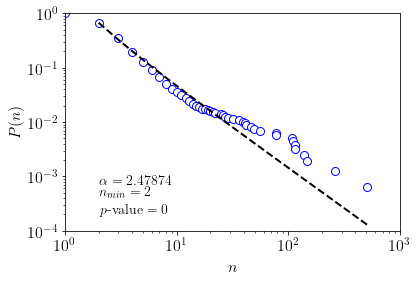

In [7]:
# plpva.example
# x = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4], dtype=float)  # sample data
x = np.array(degree_sequence, dtype=float)  # sample data
variable = "n"
subject = "example"
radius = 0.5
number_of_sets = 100
plpva_example.example.power_law(x, variable, subject, radius, number_of_sets)
del x
# Image(filename ='plplot_example.png')

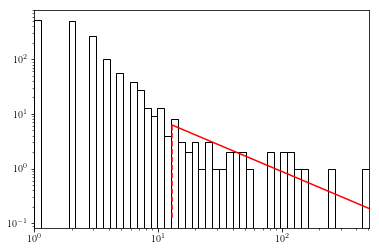

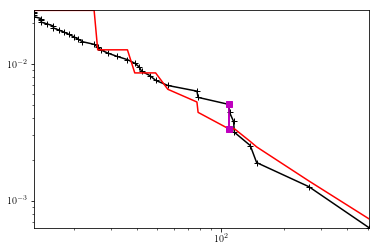

In [8]:
# generate a power law using the "inverse" power-law generator code
# X=plfit.plexp_inv(rand(1000),1,2.5)
X = np.array(degree_sequence)

# use the numpy version to fit (usefortran=False is only needed if you installed the fortran version)
myplfit=plfit.plfit(X,usefortran=False)

# output should look something like this:
# PYTHON plfit executed in 0.201362 seconds
# xmin: 0.621393 n(>xmin): 263 alpha: 2.39465 +/- 0.0859979   Log-Likelihood: -238.959   ks: 0.0278864 p(ks): 0.986695

# generate some plots
from pylab import *
figure(1)
myplfit.plotpdf()

figure(2)
myplfit.plotcdf()

# POWERLAW PACKAGE

In [8]:
cent_15.columns

Index([u'Source', u'Target', u'Interaction'], dtype='object')

------------------------------------------------------
---------------------------02 Fruhneuhochdeutsch early new high_15_cent_NumSets_0.5_radius_100.png-----------------
------------------------------------------------------


Calculating best minimal value for power law fit
Assuming nested distributions


('fit.power_law.alpha: ', 2.2845060300178774, 'fit.power_law.sigma: ', 0.111380798454235, 'fit.xmin: ', 4.0, 'fit.power_law.parameter1_name: ', None)
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
('R: ', 3.223445196190999, 'p: ', 0.0012665853238127758)
("test ('power_law', '", 'lognormal', "'): ", 'R: ', -1.0171402958996238, 'p: ', 0.30908669327659044)
("test ('power_law', '", 'exponential', "'): ", 'R: ', 3.223445196190999, 'p: ', 0.0012665853238127758)
("test ('power_law', '", 'truncated_power_law', "'): ", 'R: ', -0.09996533850961621, 'p: ', 0.8500765498657981)
("test ('power_law', '", 'stretched_exponential', "'): ", 'R: ', 1.3527783863620695, 'p: ', 0.17612643962346353)
("test ('power_law', '", 'lognormal_positive', "'): ", 'R: ', 2.089203189270576, 'p: ', 0.03668943647378007)
- Fitting power la

<IPython.core.display.Javascript object>


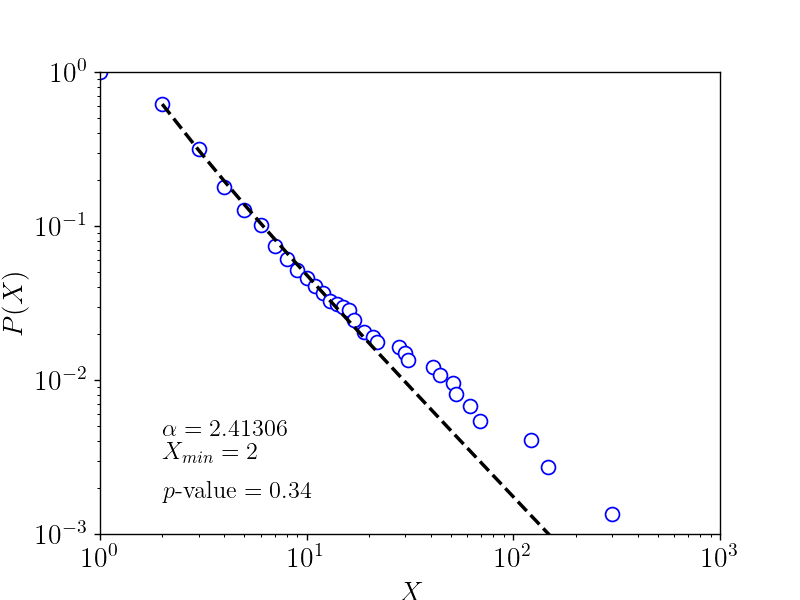

------------------------------------------------------
---------------------------02 Fruhneuhochdeutsch early new high_16_cent_NumSets_0.5_radius_100.png-----------------
------------------------------------------------------


Calculating best minimal value for power law fit
Assuming nested distributions


('fit.power_law.alpha: ', 2.3923240227647096, 'fit.power_law.sigma: ', 0.06777727296615846, 'fit.xmin: ', 3.0, 'fit.power_law.parameter1_name: ', None)
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
('R: ', 4.309784258683822, 'p: ', 1.6341388665531645e-05)
("test ('power_law', '", 'lognormal', "'): ", 'R: ', -1.1034789852243945, 'p: ', 0.26981921264784703)
("test ('power_law', '", 'exponential', "'): ", 'R: ', 4.309784258683822, 'p: ', 1.6341388665531645e-05)
("test ('power_law', '", 'truncated_power_law', "'): ", 'R: ', -0.3185315986972056, 'p: ', 0.491268581785551)
("test ('power_law', '", 'stretched_exponential', "'): ", 'R: ', 2.2579999034928075, 'p: ', 0.02394566545146205)
("test ('power_law', '", 'lognormal_positive', "'): ", 'R: ', 3.40889433165161, 'p: ', 0.0006522673974712621)
- Fitting power

<IPython.core.display.Javascript object>


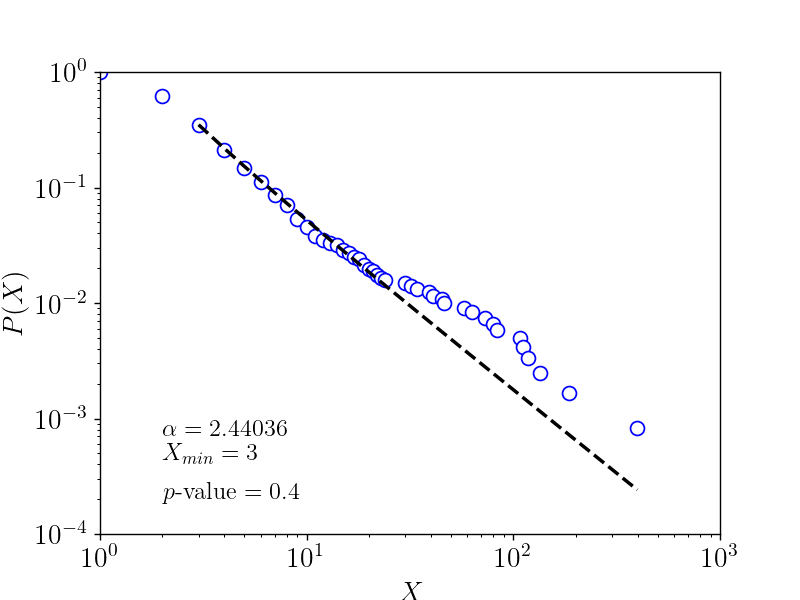

------------------------------------------------------
---------------------------02 Fruhneuhochdeutsch early new high_17_cent_NumSets_0.2_radius_100.png-----------------
------------------------------------------------------


Calculating best minimal value for power law fit
Assuming nested distributions


('fit.power_law.alpha: ', 2.3556178763355415, 'fit.power_law.sigma: ', 0.041598246950790924, 'fit.xmin: ', 2.0, 'fit.power_law.parameter1_name: ', None)
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
('R: ', 3.9533626285185166, 'p: ', 7.706051339408023e-05)
("test ('power_law', '", 'lognormal', "'): ", 'R: ', -0.6886409517445348, 'p: ', 0.4910492435242966)
("test ('power_law', '", 'exponential', "'): ", 'R: ', 3.9533626285185166, 'p: ', 7.706051339408023e-05)
("test ('power_law', '", 'truncated_power_law', "'): ", 'R: ', -1.3921251198181224, 'p: ', 0.006508538720128798)
("test ('power_law', '", 'stretched_exponential', "'): ", 'R: ', 0.42603708453487427, 'p: ', 0.6700808237006335)
("test ('power_law', '", 'lognormal_positive', "'): ", 'R: ', 2.3594526084464404, 'p: ', 0.018301918382711085)
- Fitting p

<IPython.core.display.Javascript object>


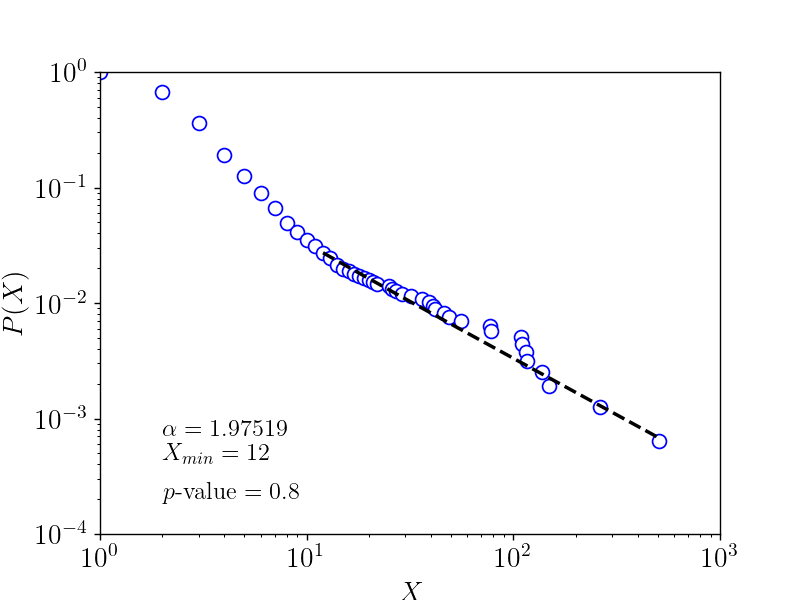

------------------------------------------------------
---------------------------02 Fruhneuhochdeutsch early new high_17_cent_NumSets_0.5_radius_100.png-----------------
------------------------------------------------------


Calculating best minimal value for power law fit
Assuming nested distributions


('fit.power_law.alpha: ', 2.3556178763355415, 'fit.power_law.sigma: ', 0.041598246950790924, 'fit.xmin: ', 2.0, 'fit.power_law.parameter1_name: ', None)
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
('R: ', 3.9533626285185166, 'p: ', 7.706051339408023e-05)
("test ('power_law', '", 'lognormal', "'): ", 'R: ', -0.6886409517445348, 'p: ', 0.4910492435242966)
("test ('power_law', '", 'exponential', "'): ", 'R: ', 3.9533626285185166, 'p: ', 7.706051339408023e-05)
("test ('power_law', '", 'truncated_power_law', "'): ", 'R: ', -1.3921251198181224, 'p: ', 0.006508538720128798)
("test ('power_law', '", 'stretched_exponential', "'): ", 'R: ', 0.42603708453487427, 'p: ', 0.6700808237006335)
("test ('power_law', '", 'lognormal_positive', "'): ", 'R: ', 2.3594526084464404, 'p: ', 0.018301918382711085)
- Fitting p

<IPython.core.display.Javascript object>


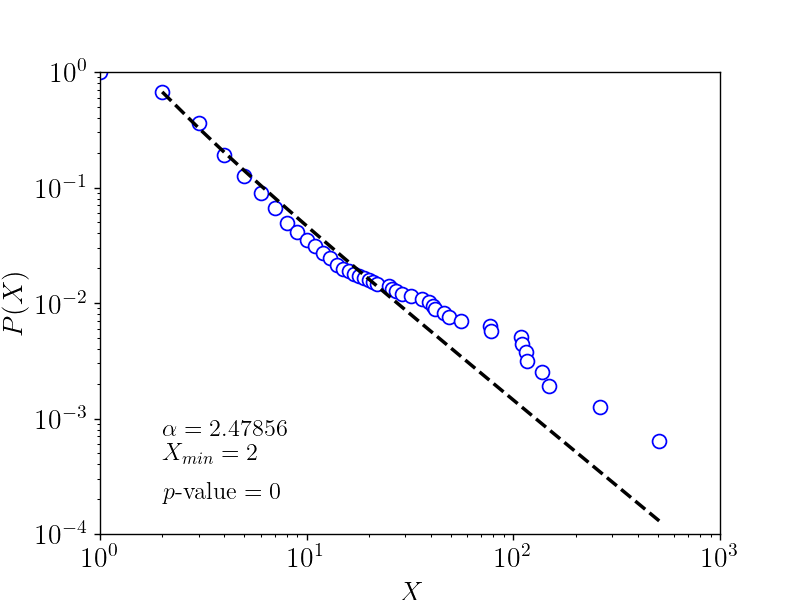

------------------------------------------------------
---------------------------02 Fruhneuhochdeutsch early new high_L14_cent_NumSets_0.5_radius_100.png-----------------
------------------------------------------------------


Calculating best minimal value for power law fit
Assuming nested distributions


('fit.power_law.alpha: ', 2.410529703823289, 'fit.power_law.sigma: ', 0.08326093581828957, 'fit.xmin: ', 3.0, 'fit.power_law.parameter1_name: ', None)
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
('R: ', 3.3429408648467227, 'p: ', 0.0008289556298241861)
("test ('power_law', '", 'lognormal', "'): ", 'R: ', -1.0782069853439897, 'p: ', 0.2809413952951012)
("test ('power_law', '", 'exponential', "'): ", 'R: ', 3.3429408648467227, 'p: ', 0.0008289556298241861)
("test ('power_law', '", 'truncated_power_law', "'): ", 'R: ', -0.2720082902594924, 'p: ', 0.5615294751928611)
("test ('power_law', '", 'stretched_exponential', "'): ", 'R: ', 1.5438941250849794, 'p: ', 0.12261398357432933)
("test ('power_law', '", 'lognormal_positive', "'): ", 'R: ', 2.608282422138607, 'p: ', 0.009099784117995866)
- Fitting power 

<IPython.core.display.Javascript object>


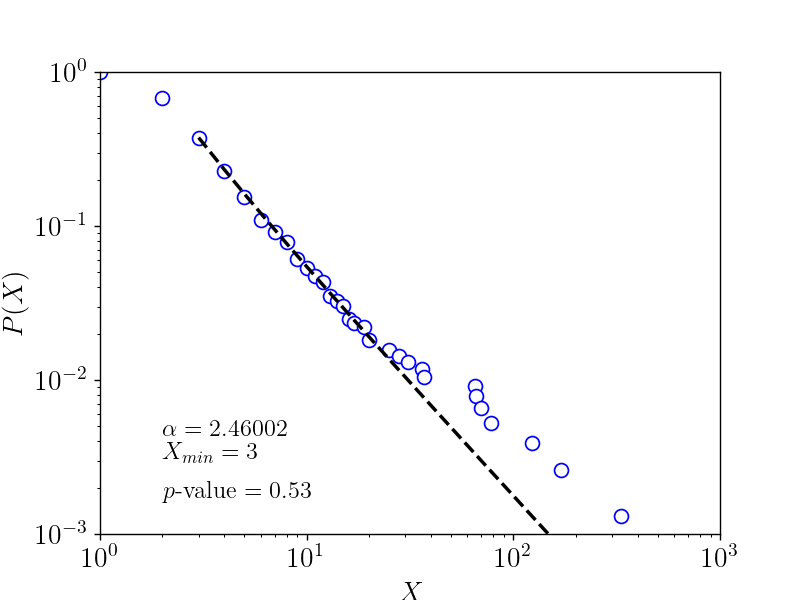

------------------------------------------------------
---------------------------01 Mittelhochdeutsch middle high_11_cent_NumSets_0.5_radius_100.png-----------------
------------------------------------------------------


Calculating best minimal value for power law fit
Assuming nested distributions


('fit.power_law.alpha: ', 2.418687224783902, 'fit.power_law.sigma: ', 0.0869852947939761, 'fit.xmin: ', 2.0, 'fit.power_law.parameter1_name: ', None)
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
('R: ', 2.730464839934862, 'p: ', 0.0063245079031006134)
("test ('power_law', '", 'lognormal', "'): ", 'R: ', -1.306519769050626, 'p: ', 0.1913758606794187)
("test ('power_law', '", 'exponential', "'): ", 'R: ', 2.730464839934862, 'p: ', 0.0063245079031006134)
("test ('power_law', '", 'truncated_power_law', "'): ", 'R: ', -0.7063365952899747, 'p: ', 0.1403283449114736)
("test ('power_law', '", 'stretched_exponential', "'): ", 'R: ', 0.5497626515563109, 'p: ', 0.5824821785818728)
("test ('power_law', '", 'lognormal_positive', "'): ", 'R: ', 2.138098375650986, 'p: ', 0.03250875975137625)
- Fitting power law to

<IPython.core.display.Javascript object>


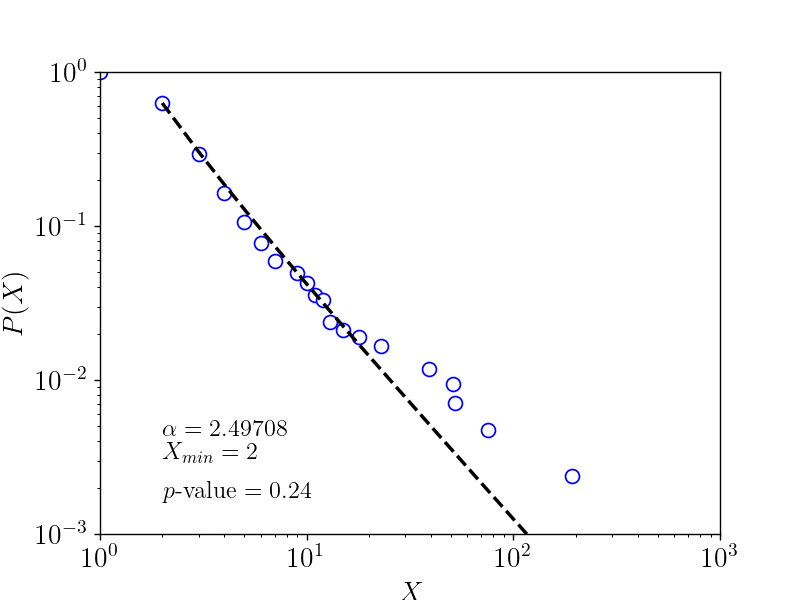

------------------------------------------------------
---------------------------01 Mittelhochdeutsch middle high_12_cent_NumSets_0.5_radius_100.png-----------------
------------------------------------------------------


Calculating best minimal value for power law fit
Assuming nested distributions


('fit.power_law.alpha: ', 2.379425413338228, 'fit.power_law.sigma: ', 0.08017747356189296, 'fit.xmin: ', 2.0, 'fit.power_law.parameter1_name: ', None)
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
('R: ', 3.1243522937451367, 'p: ', 0.0017819696336960839)
("test ('power_law', '", 'lognormal', "'): ", 'R: ', -1.311272733587169, 'p: ', 0.18976563690984816)
("test ('power_law', '", 'exponential', "'): ", 'R: ', 3.1243522937451367, 'p: ', 0.0017819696336960839)
("test ('power_law', '", 'truncated_power_law', "'): ", 'R: ', -0.7092458457906148, 'p: ', 0.1386496484387606)
("test ('power_law', '", 'stretched_exponential', "'): ", 'R: ', 0.4774632685552981, 'p: ', 0.6330322708013012)
("test ('power_law', '", 'lognormal_positive', "'): ", 'R: ', 2.495463304764263, 'p: ', 0.01257927653675177)
- Fitting power la

<IPython.core.display.Javascript object>


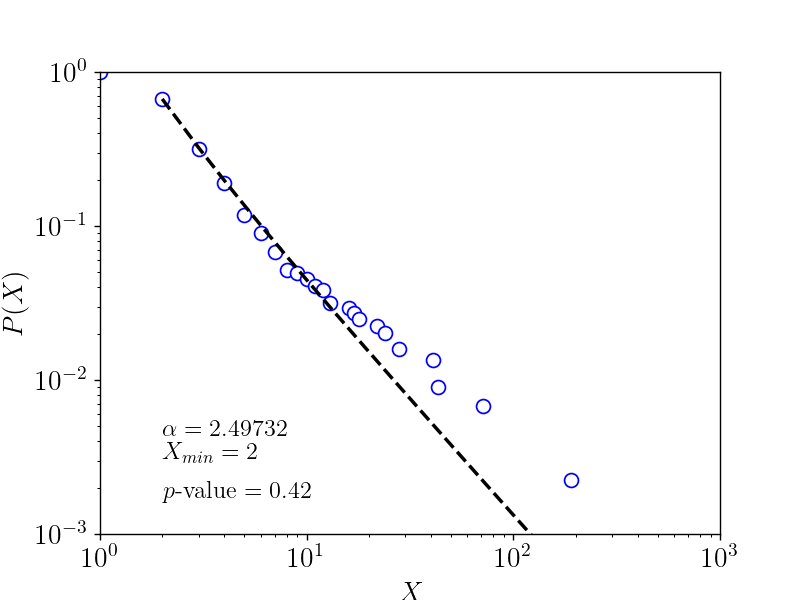

------------------------------------------------------
---------------------------01 Mittelhochdeutsch middle high_13_cent_NumSets_0.5_radius_100.png-----------------
------------------------------------------------------


Calculating best minimal value for power law fit
Assuming nested distributions


('fit.power_law.alpha: ', 2.3614281686660474, 'fit.power_law.sigma: ', 0.09650908407362796, 'fit.xmin: ', 3.0, 'fit.power_law.parameter1_name: ', None)
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
('R: ', 3.3545037840285534, 'p: ', 0.0007950746571563864)
("test ('power_law', '", 'lognormal', "'): ", 'R: ', -1.061778864899218, 'p: ', 0.2883360867686897)
("test ('power_law', '", 'exponential', "'): ", 'R: ', 3.3545037840285534, 'p: ', 0.0007950746571563864)
("test ('power_law', '", 'truncated_power_law', "'): ", 'R: ', -0.21002329403706707, 'p: ', 0.649396353474021)
("test ('power_law', '", 'stretched_exponential', "'): ", 'R: ', 1.5512256632144716, 'p: ', 0.12084761410519226)
("test ('power_law', '", 'lognormal_positive', "'): ", 'R: ', 2.5258975879764627, 'p: ', 0.011540311699613748)
- Fitting power

<IPython.core.display.Javascript object>


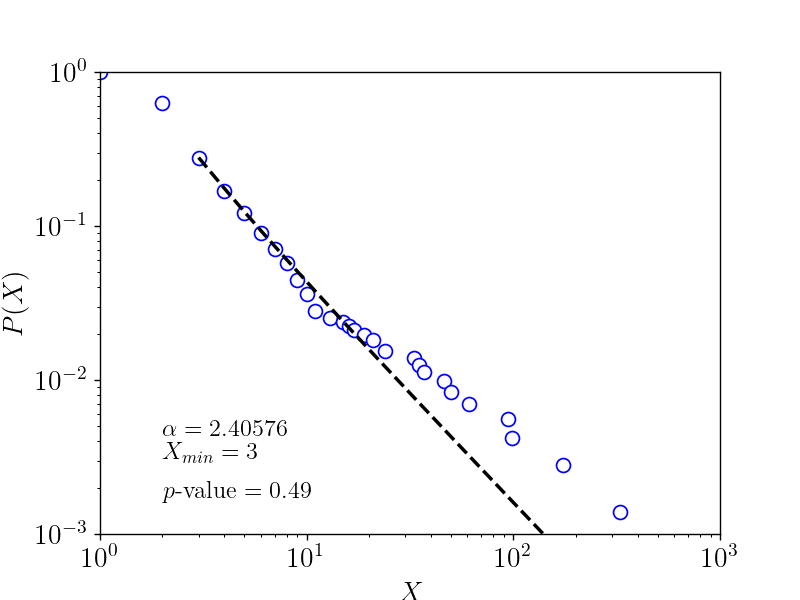

------------------------------------------------------
---------------------------01 Mittelhochdeutsch middle high_E14_cent_NumSets_0.5_radius_100.png-----------------
------------------------------------------------------


Calculating best minimal value for power law fit
Assuming nested distributions


('fit.power_law.alpha: ', 2.359840552123119, 'fit.power_law.sigma: ', 0.12066633656944518, 'fit.xmin: ', 4.0, 'fit.power_law.parameter1_name: ', None)
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
('R: ', 3.4554261047572723, 'p: ', 0.0005494237724730348)
("test ('power_law', '", 'lognormal', "'): ", 'R: ', -1.0177463513922038, 'p: ', 0.30879851343267917)
("test ('power_law', '", 'exponential', "'): ", 'R: ', 3.4554261047572723, 'p: ', 0.0005494237724730348)
("test ('power_law', '", 'truncated_power_law', "'): ", 'R: ', -0.08590324866006495, 'p: ', 0.8501244917088511)
("test ('power_law', '", 'stretched_exponential', "'): ", 'R: ', 1.5378929298124346, 'p: ', 0.1240747962962781)
("test ('power_law', '", 'lognormal_positive', "'): ", 'R: ', 2.0494745887177657, 'p: ', 0.0404157301852802)
- Fitting power 

<IPython.core.display.Javascript object>


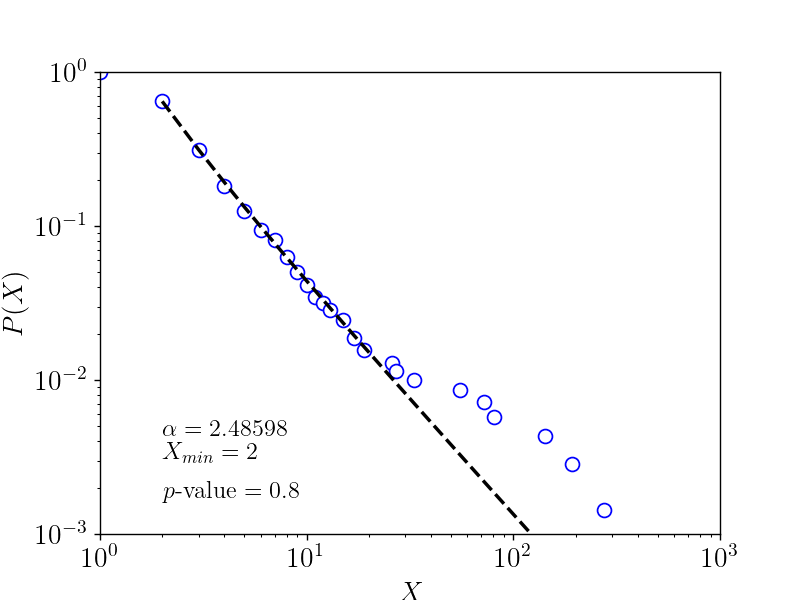

In [6]:
# %matplotlib agg
%matplotlib notebook
# UsageError: Invalid GUI request u'agg', valid ones are:['osx', 'widget', 'qt5', 'qt', 'nbagg', None, 'gtk', 'qt4', 'gtk3', 'notebook', 'tk', 'ipympl', 'inline', 'asyncio', 'wx']

def plots_do(families):

    for family, nets in families.items():
        for net in nets:
            net_file = net['file']

            variable = "X"
            radius = net["radius"] #0.5
            number_of_sets = 100
            subject = "{}_{}_NumSets_{}_radius_{}.png".format(family, net_file.split('.')[0], radius, number_of_sets)

            print('------------------------------------------------------')
            print('---------------------------{}-----------------'.format(subject))
            print('------------------------------------------------------')

            cent_15 = pd.read_excel(path_dataset_dir + family + "/" + net_file).rename(columns={
                'Source ': 'Source'
            })

            G=nx.from_pandas_edgelist(cent_15, 'Source', 'Target')
            # nx.draw(G, with_labels=True)
    #         degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
            degree_sequence = np.array([d for n, d in G.degree()])

            fit = powerlaw.Fit(degree_sequence, discrete=True, estimate_discrete=True)

            print("fit.power_law.alpha: ", fit.power_law.alpha, "fit.power_law.sigma: ", fit.power_law.sigma,
                 "fit.xmin: ", fit.xmin, "fit.power_law.parameter1_name: ", fit.power_law.parameter1_name)

            print("R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.")
            R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
            print ("R: ", R, "p: ", p)
    #         print("Also test with: ", fit.supported_distributions)

            for dist_name in fit.supported_distributions.keys():
                if dist_name == 'power_law':
                    continue

                R, p = fit.distribution_compare('power_law', dist_name, normalized_ratio=True)
                print ("test ('power_law', '", dist_name, "'): ", "R: ", R, "p: ", p)
                pass

            plpva_example.example.power_law(degree_sequence, variable, subject, radius, number_of_sets)


            pass
    
plots_do(
    families = {
    "01 Mittelhochdeutsch middle high":[
        {"radius": 0.5, "file": "11_cent.xlsx"}, 
        {"radius": 0.5, "file": "12_cent.xlsx"}, 
        {"radius": 0.5, "file": "13_cent.xlsx"}, 
        {"radius": 0.5, "file": "E14_cent.xlsx"}
    ], 
    "02 Fruhneuhochdeutsch early new high": [
        {"radius": 0.5, "file": "15_cent.xlsx"}, 
        {"radius": 0.5, "file": "16_cent.xlsx"}, 
        {"radius": 0.2, "file": "17_cent.xlsx"}, 
        {"radius": 0.5, "file": "17_cent.xlsx"}, 
        {"radius": 0.5, "file": "L14_cent.xlsx"}, 
    ]
    }
)

# Old Stuff

------------------------------------------------------
---------------------------02 Fruhneuhochdeutsch early new high_15cent_NumSets_0.5_radius_100-----------------
------------------------------------------------------


Calculating best minimal value for power law fit
Assuming nested distributions


('fit.power_law.alpha: ', 2.2845060300178774, 'fit.power_law.sigma: ', 0.111380798454235, 'fit.xmin: ', 4.0, 'fit.power_law.parameter1_name: ', None)
R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.
('R: ', 3.223445196190999, 'p: ', 0.0012665853238127758)
("test ('power_law', '", 'lognormal', "'): ", 'R: ', -1.0171402958996238, 'p: ', 0.30908669327659044)
("test ('power_law', '", 'exponential', "'): ", 'R: ', 3.223445196190999, 'p: ', 0.0012665853238127758)
("test ('power_law', '", 'truncated_power_law', "'): ", 'R: ', -0.09996533850961621, 'p: ', 0.8500765498657981)
("test ('power_law', '", 'stretched_exponential', "'): ", 'R: ', 1.3527783863620695, 'p: ', 0.17612643962346353)
("test ('power_law', '", 'lognormal_positive', "'): ", 'R: ', 2.089203189270576, 'p: ', 0.03668943647378007)
- Fitting power la

<IPython.core.display.Javascript object>


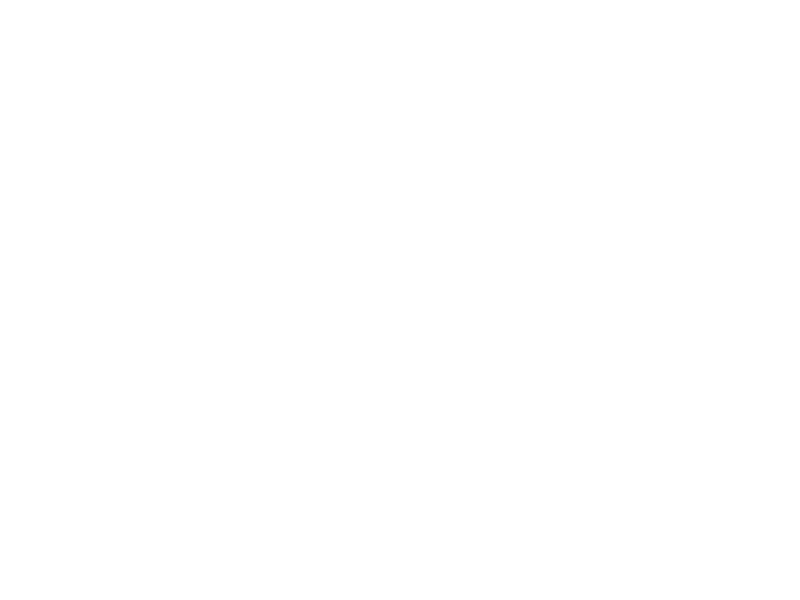

ValueError: Format '5_radius_100' is not supported (supported formats: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz)

Error in callback <function post_execute at 0x000000001A281978> (for post_execute):


AttributeError: 'FigureCanvasNbAgg' object has no attribute 'manager'

In [12]:
families = {
    "01 Mittelhochdeutsch middle high":[
        {"radius": 0.5, "file": "11.century.xlsx"}, 
        {"radius": 0.5, "file": "12. century.xlsx"}, 
        {"radius": 0.5, "file": "13century .xlsx"}, 
        {"radius": 0.5, "file": "E14.xlsx"}
    ], 
    "02 Fruhneuhochdeutsch early new high": [
        {"radius": 0.5, "file": "15cent.xlsx"}, 
        {"radius": 0.5, "file": "16.cent.xlsx"}, 
        {"radius": 0.5, "file": "17.cent.xlsx"}, 
        {"radius": 0.5, "file": "L14.Century.xlsx"}, 
    ]
}

%matplotlib agg
# %matplotlib notebook

for family, nets in families.items():
    for net in nets:
        net_file = net['file']
        
        variable = "X"
        radius = net["radius"] #0.5
        number_of_sets = 100
        subject = "{}_{}_NumSets_{}_radius_{}".format(family, net_file.split('.')[0], radius, number_of_sets)
        
        print('------------------------------------------------------')
        print('---------------------------{}-----------------'.format(subject))
        print('------------------------------------------------------')
        
        cent_15 = pd.read_excel(path_dataset_dir + family + "/" + net_file).rename(columns={
            'Source ': 'Source'
        })

        G=nx.from_pandas_edgelist(cent_15, 'Source', 'Target')
        # nx.draw(G, with_labels=True)
#         degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
        degree_sequence = np.array([d for n, d in G.degree()])
        
        fit = powerlaw.Fit(degree_sequence, discrete=True, estimate_discrete=True)
    
        print("fit.power_law.alpha: ", fit.power_law.alpha, "fit.power_law.sigma: ", fit.power_law.sigma,
             "fit.xmin: ", fit.xmin, "fit.power_law.parameter1_name: ", fit.power_law.parameter1_name)

        print("R is the loglikelihood ratio between the two candidate distributions. This number will be positive         if the data is more likely in the rst distribution, and negative if the data is more likely in the second         distribution.")
        R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
        print ("R: ", R, "p: ", p)
#         print("Also test with: ", fit.supported_distributions)

        for dist_name in fit.supported_distributions.keys():
            if dist_name == 'power_law':
                continue

            R, p = fit.distribution_compare('power_law', dist_name, normalized_ratio=True)
            print ("test ('power_law', '", dist_name, "'): ", "R: ", R, "p: ", p)
            pass
        
        plpva_example.example.power_law(degree_sequence, variable, subject, radius, number_of_sets)
    
#     Binning for degree dist
        if True:
    
            fit = powerlaw.Fit(X, discrete=True, estimate_discrete=True)
            # Calculating best minimal value for power law fit> 
            fit.power_law.alpha
            fit.power_law.sigma

            title = "{} - {}<br />PowerLaw ~ exponential: {}<br />PoweLaw ~ lognormal: {}".format(
                family, net_file,
                fit.distribution_compare('power_law', 'exponential'),
                fit.distribution_compare('power_law', 'lognormal')
            )

            fig2 = fit.plot_pdf(color='b', linewidth=2)
            fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
            fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
            fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)
            # ---------------------------------------------
            # G=  nx.from_pandas_edgelist(cent_15, 'Source', 'Target')
            # G = G.to_directed()
            # nx.draw(G, with_labels=True)
            # degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)

            x, p = get_binning(data=degree_sequence, num_bins = 15, 
                               is_pmf = False, log_binning = True, threshold = 0, low=None, up=None)

            if False:
                degreeCount = collections.Counter(X)
                deg, cnt = zip(*degreeCount.items())

            fig = go.Figure()

            fig.add_trace(go.Scatter(
                x=x,
                y=p
            ))

            fig.update_layout(xaxis_type="log", yaxis_type="log", title=title)

            fig.write_image("temp/L_{}_{}.png".format(family, net_file))

    #         pio.show(fig, renderer='browser', validate=True)

            # fig.show()

            # fig, ax = plt.subplots()
            # plt.bar(np.log(deg), np.log(cnt), width=0.80, color='b')
            pass
        pass

In [85]:
degreeCount = collections.Counter(X)
deg, cnt = zip(*degreeCount.items())

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x,
    y=p
))

fig.update_layout(xaxis_type="log", yaxis_type="log", title="{} - {}".format(family, net))
fig.show()

# fig, ax = plt.subplots()
# plt.bar(np.log(deg), np.log(cnt), width=0.80, color='b')

NameError: name 'family' is not defined

In [13]:
path_dataset_dir = "../German/"
cent_15 = pd.read_excel( path_dataset_dir + "/02 Frühneuhochdeutsch early new high/15cent.xlsx")

G=nx.from_pandas_edgelist(cent_15, 'Source', 'Target')
# nx.draw(G, with_labels=True)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
data = degree_sequence
fit = powerlaw.Fit(data, discrete=True, estimate_discrete=True)

fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit
C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide



(73.34520449577172, 0.0012665853238127758)

In [14]:
fit.power_law.plot_pdf(color='b')

<AxesSubplot:>

In [38]:
print("fit.power_law.alpha: ", fit.power_law.alpha, "fit.power_law.sigma: ", fit.power_law.sigma,
     "fit.xmin: ", fit.xmin, "fit.power_law.parameter1_name: ", fit.power_law.parameter1_name)

print("""R is the loglikelihood ratio between the two candidate distributions. This number will be positive
if the data is more likely in the rst distribution, and negative if the data is more likely in the second
distribution.""")
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
print ("R: ", R, "p: ", p)
print("Also test with: ", fit.supported_distributions)

fit.power_law.alpha:  2.5504404974544377 fit.power_law.sigma:  0.13444024124966789 fit.xmin:  4.0 fit.power_law.parameter1_name:  None
R is the loglikelihood ratio between the two candidate distributions. This number will be positive
if the data is more likely in the rst distribution, and negative if the data is more likely in the second
distribution.
R:  3.841046580239975 p:  0.00012251086210349107
Also test with:  {'power_law': <class 'powerlaw.Power_Law'>, 'lognormal': <class 'powerlaw.Lognormal'>, 'exponential': <class 'powerlaw.Exponential'>, 'truncated_power_law': <class 'powerlaw.Truncated_Power_Law'>, 'stretched_exponential': <class 'powerlaw.Stretched_Exponential'>, 'lognormal_positive': <class 'powerlaw.Lognormal_Positive'>}


In [15]:
for dist_name in fit.supported_distributions.keys():
    if dist_name == 'power_law':
        continue
        
    R, p = fit.distribution_compare('power_law', dist_name, normalized_ratio=True)
    print ("test ('power_law', '", dist_name, "'): ", "R: ", R, "p: ", p)

C:\Anaconda3\lib\site-packages\powerlaw.py:1560: RuntimeWarning:

invalid value encountered in true_divide

C:\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning:

invalid value encountered in true_divide

Assuming nested distributions


test ('power_law', ' lognormal '):  R:  -1.0171402958996238 p:  0.30908669327659044
test ('power_law', ' exponential '):  R:  3.223445196190999 p:  0.0012665853238127758
test ('power_law', ' truncated_power_law '):  R:  -0.09996533850961621 p:  0.8500765498657981
test ('power_law', ' stretched_exponential '):  R:  1.3527783863620695 p:  0.17612643962346353
test ('power_law', ' lognormal_positive '):  R:  2.0892031892705734 p:  0.03668943647378032


In [57]:
[d for d in data if d == 1]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


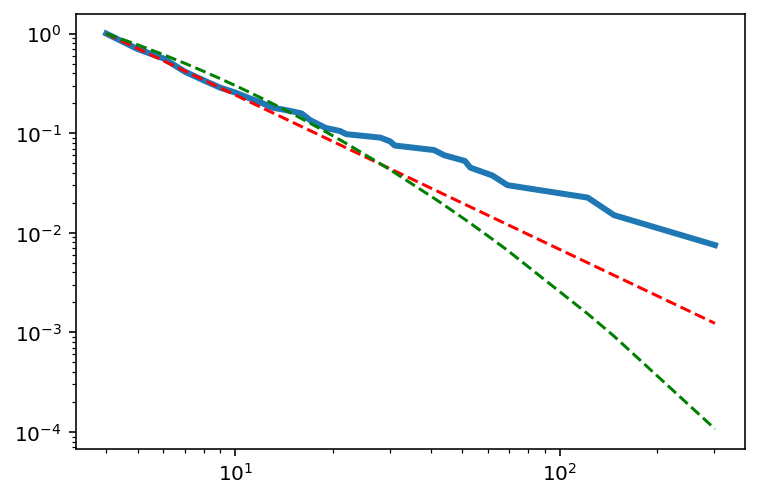

In [47]:
fig4 = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--')
fit.lognormal_positive.plot_ccdf(ax=fig4, color='g', linestyle='--')

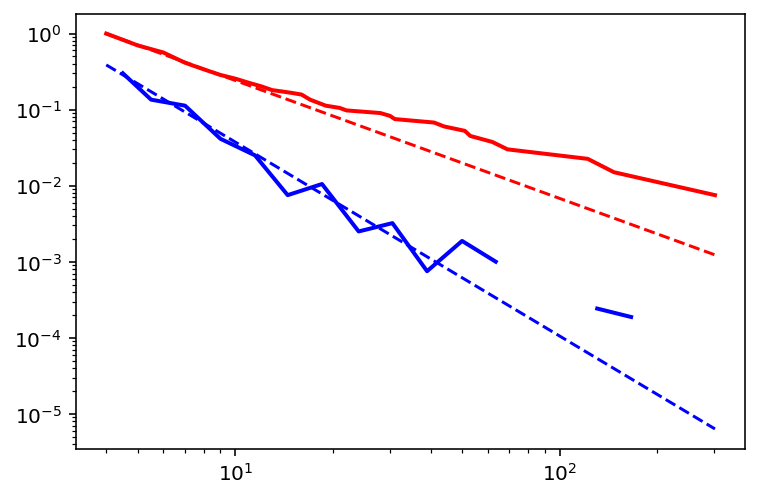

In [32]:
# powerlaw.plot_pdf(data, color='r', linear_bins=True)

fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig2)
fit.plot_ccdf(color='r', linewidth=2, ax=fig2)
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=fig2)